## Boxplots
-------------------

### Introduction
------------------------------
The boxplot was first introduced by John Tukey in 1977 as part of his toolkit for exploratory data analytics and is now one of the most frequently utilised statistical graphs [1]. The traditional boxplot is typically used for univariate data exploration and for the comparison of several univariate variables [2]. It is constructed to display the median, the upper and lower quartiles, the interquartile range, the upper and lower extremes as well as any potential outlier data points (Fig 1). In addition to this,  a box plot can provide information on the spread of the data (by the length of the box and  the distance between the upper and lower extremes), skewness by the deviation of the median line from the centre of the box, and longtailedness by the distance between the ends of the whiskers relative to the length of the box [3].  


In [36]:
%%html
<img src = "img/boxplot.JPG">

Fig (1):  Annotated boxplot of 1000 points from a normal distbution with a mean of 100 and standard deviation of 20.[2]

There have been many alternatives and variations of the boxplot proposed in the literature. The purpose of this Juypter notebook was to demonstrate the creation and interpretation of a boxplot using commonly utilised python packages and the Titanic dataset (https://www.kaggle.com/c/titanic). In addition to this, several alternative and variations of the boxplot will be illustrated.

### Creating a Boxplot 
---------------------------------

After firstly loading the required packages, the Titanic dataset was imported and screened.   The Titanic dataset contains 13 demographic and travel features for 1,309 Titanic passengers and their survival status.  However, for the purpose of this assignment, our descriptive analysis will be delimited to the age and survival features. 

In [37]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
#confirm directory for your dataset
print(os)
#Read in data from a csv file
df = pd.read_csv('titanic3.csv') 
#print first 5 lines of imported data to see data types
df.head()
#Delimit data to the age and surival column
df = df[['age','survived']]

<module 'os' from 'C:\\Users\\Harvey Norman\\Ana\\Anaconda1\\lib\\os.py'>


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Data is screened for missing data and NaNs. Rather than inputing these values in anyway, these cells are dropped from the analysis. Finally boxplots of age for the binary survival metric is plotted (Fig 2).

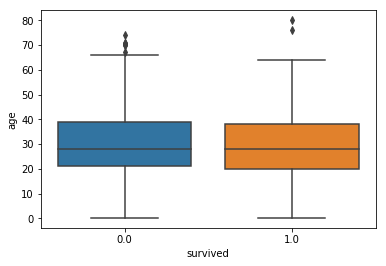

In [39]:
#Boxplot created on Titanic dataset
sns.boxplot(x = "survived", y="age", data = df)

Fig(2). Boxplot of Age for those who did () and did not survive()

### Visual interpretation of the boxplot based on Titantic dataset 
-------------------------------------------------------------

The boxplot above compares the age of passangers that survived (1.0) against those that died (0.0). 

Outliers

- The points above the whiskers identify potential outliers that need to be investigated.
- There apear to be 4 potential outliers in the group who survied and 2 in the group who did not survive.
- The potential outliers are more extremer in the group who did not survive in comparison to group who did survive.

Distribution 

- The median age of 28 is the same across both groups. 
- The lower quartile ranges from approximatily 1-20 years for both groups. 
- The upper quratile appears to be different for each group. The group who survived demonstrate values ranging from 39-62 while the group who did not survive demonstrate values ranging from 39-65.
- Interquartile ranges between 20-38 years and 21-39 years for the group who survived and group who did not respectively. 
- At first glance the group who did not survive appear to have a more positivly skewed distribution (longer upper whisker and off-centred median line) in comparision to the group who did survive. However, the presence of more extreme values in the group who survived may also cause this dataset to be postively skewed. 
 

Given the overlap of the interqurtile ranges and median values it would appear that the two groups are not linerly seperable on the age feature alone. The box plots are a usefull means of visualising and comparing univariate distribution and the visual inspection of the plot provides close estimates of the actual calculated values below.


### Limitations of the boxplot 
-------------------------------------------------------------
The boxplot is not without its limitations. For example, if the underlying  data are skewed, usually many points exceed the whiskers and are often erroneously declared as outliers. [4] Furthermore, the boxplot does not display the original datpoints that make up your data and can only be used with numerical data. The boxplot is also limited in its ability to depict variations in your data [2]. For example, data was randomly generated for bimodal data distribution and plotted below. Using the boxplot alone, will not depict this underlying distribution, however the violinplot clearly depicts the presence of two modes.  Identifying this underlying distribution may affect your interpretation of the data or result in you using additional statistical techniques (e.g. clustering).


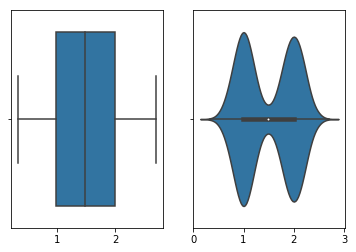

In [40]:
# ignore warnings regarding deprications of functions.
import warnings
warnings.filterwarnings("ignore")

#Set the seed to allow the same data to be reproduced
np.random.seed(10)

#Generate random data to display bimodial distribution
BimodData= np.concatenate((np.random.normal(1,.2,2500),np.random.normal(2,.2,2500)))
plt.subplot(1,2,1)
sns.boxplot(BimodData)
plt.subplot(1,2,2)
sns.violinplot(BimodData)

### Alternatives to the boxplot
----------------------------------
There are many alternatives to the boxplot that can also be used to show the distribution of univariate data. For example, there are histograms, scatterplots, stem and leaf plots and density trees [2]. However, these either take up a great deal of space and/or are difficult to compare between multiple variables as the plots become cluttered. For example, a histogram and swarm plot are displayed below.  The histogram displays the frequency of data in ranges of values or “bins”. In addition, in this version the distribution shape is plotted with a “kernel density function”. One specific disadvantage of a histogram, is the choice of bin size, which can affect the shape of the distribution.  An alternative to a histogram is the swarmplot. Each point in the swarm plot demonstrates the individual values on the y axis, in this case the age. As such, a swarm plot avoids any disadvantage/bias associated with selecting a histogram bin size. However, Swarm plots do not scale well with larger datasets (they become cluttered) and as such their use is limited.

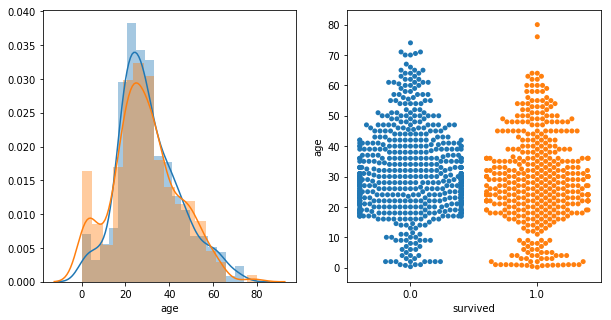

In [41]:
#Remove null values
emptyidx = pd.isnull(df) 
if np.sum(np.sum(emptyidx)) >0 :
    df = df.dropna()
    
# Create histogram
target_0 = df.loc[df.survived == 0]
target_1 = df.loc[df.survived == 1]
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
plt.subplot(1,2,1)
sns.distplot(target_0.age)
sns.distplot(target_1.age)

#Create scatterplot
plt.subplot(1,2,2)
sns.swarmplot(x="survived", y="age",data=df)

Variations of the boxplot 
--------------------------

Due to their practicallity, overtime boxplots have evolved into a wealth of variations and enhancements.The variations have consisted of changes in both the grapical display and the definitions of the original graph. Examples of the variations include the violin,notched boxplots and beanplots displayed and discussed below.[1]
 

<Figure size 960x800 with 0 Axes>

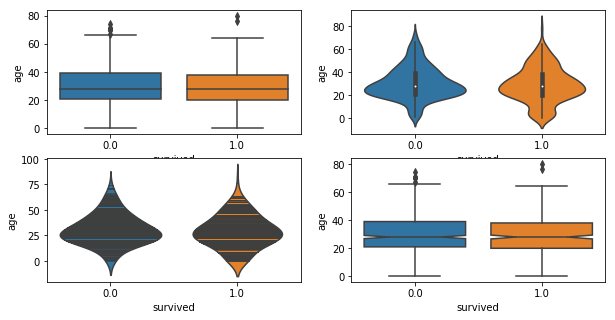

In [42]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')    
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)
#set x and y axis data and create boxplot        
sns.boxplot(x = "survived", y="age", data = df, ax=ax[0][0])
sns.violinplot(x='survived', y='age',data=df, ax=ax[0][1])
sns.boxplot(x='survived', y='age',data=df, notch = True,ax=ax[1][1])
sns.violinplot(x="survived", y="age",data=df, inner="stick", bw=.5,ax=ax[1][0])
fig.show()

Fig(3) Variations of the boxplot depicting age grouped by the binary survival feature






#### The Violinplot
-------------------------------------- 
The Violin plot (Fig 3, upper right) is a common variant of the boxplot.  Like the traditional Boxplot ( Fig 3, upper left) the violin plot depicts the median as the white dot and the interquartile range as the thick centre bar. In addition, the Violin plot displays the 95% confidence interval as the thin centre bar and importantly the shaded region surrounding this bar depicts the distribution of the data.

#### The Beanplot
--------------------------------
A Beanplot (Fig 3, lower left) is much like the Violin plot in that it depicts the density of the data using the shaded region. It displays the data points via lines plotted on the graph. This can be useful to see the values of the data are distributed. From the beanpot graph below you can see that there is minimal data points over 70 years of age for both groups. 

#### Notched Boxplot
-------------------------------------------------
A Notched Boxplot (Fig 3, lower right) is very similar to the original boxplot, however there is an indent in the box to visually display the confidence interval around the median. This can be useful to quickly compare median values across groups. From the notched plot you can see that the confidence intervals overlap indicating that the medians are not likely to be significantly different from one another.[1]





Conclusion
--------------------------

The boxplot is a usefull visual methods of displaying and discribing univarite data in a standardized way based on several discriptive statistics. However, it is not without it's limitations and variations of this traditional method have been proposed over time. Users should explore their data and decide which method is best suit to display their data.
 

### References 
	
[1]Wickham H, Stryjewski L. 40 years of boxplots. 2011. http://vita.had.co.nz/papers/boxplots.pdf (accessed 10 Dec 2018). 

[2] Nuzzo RL. The Box Plots Alternative for Visualizing Quantitative Data. PM R 2016;8:268–72. doi:10.1016/j.pmrj.2016.02.001

[3] Beniamini Y. Opening the box of a boxplot. Am Stat 1988;42:257–62. doi:10.1080/00031305.1988.10475580

[4] Hubert M, Vandervieren E. An adjusted boxplot for skewed distributions. Comput Stat Data Anal 2008;52:5186–201. doi:10.1016/j.csda.2007.11.008

[5]VOL.11 NO.2 | FEBRUARY 2014 | NATURE METHODS 

[6] Further Exploration #4 Box Plot Variations- http://datavizcatalogue.com/blog/box-plot-variations/ 

[7] Histograms - https://statistics.laerd.com/statistical-guides/understanding-histograms.php